# Tutorial 5 - Particle Morphologies

It is sometimes useful to use surface energies in order to generate particle morphologies. This tutorial demonstrates how to obtain surface energies for surfaces containing adsorbed species using surfinpy. With these you can then generate a wulff construction using pymatgen(1). A Wulff construction is a method to determine the equilibrium shape of a crystal. So by calculating the surface energies of multiple different surfaces, at different temperature and pressure values we can generate a particle morphology for the material, in the prescence of an adsorbing species, at a specific temperature and pressure. 

(1) https://www.sciencedirect.com/science/article/pii/S0927025612006295?via%3Dihub

In [1]:
import numpy as np
from surfinpy import p_vs_t as pt
from surfinpy import wulff  
from surfinpy import utils as ut
from pymatgen.core.surface import SlabGenerator, generate_all_slabs, Structure, Lattice
from pymatgen.analysis.wulff import WulffShape

`surfinpy` has a module called wulff that will return a surface energy at a given temperature and pressure value. These can then be used in conjunction with pymatgen for a wulff construction. So first we need to declare the data for each surface and calculate the surface energies. As an aside, it is possible to provide multiple coverages, the return will be an array of surface energies, corresponding to each surface coverage, you would then select the minimum value with 
`np.amin()`

In [2]:
adsorbant = -14.22
thermochem = ut.read_nist('H2O.txt')

In [3]:
SE = 1.44
stoich =      {'M': 24, 'X': 48, 'Y': 0, 'Area': 60.22, 'Energy': -575.66, 'Label': 'Stoich'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 60.22, 'Energy': -609.23, 'Label': '1 Species'}
data = [Adsorbant_1]
Surface_100_1 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

In [4]:
SE = 1.06
stoich =      {'M': 24, 'X': 48, 'Y': 0, 'Area': 85.12, 'Energy': -672.95, 'Label': 'Stoich'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 85.12, 'Energy': -705.0, 'Label': '1 Species'}
data = [Adsorbant_1]
Surface_110_1 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

In [5]:
SE = 0.76
stoich =      {'M': 24, 'X': 48, 'Y': 0, 'Area': 77.14, 'Energy': -579.61, 'Label': 'Stoich'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 77.14, 'Energy': -609.24, 'Label': '1 Species'}
data = [Adsorbant_1]
Surface_111_1 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

shape factor: 5.147, anisotropy: 0.070, weighted surface energy: 0.803 J/m^2


C:\Users\adam\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


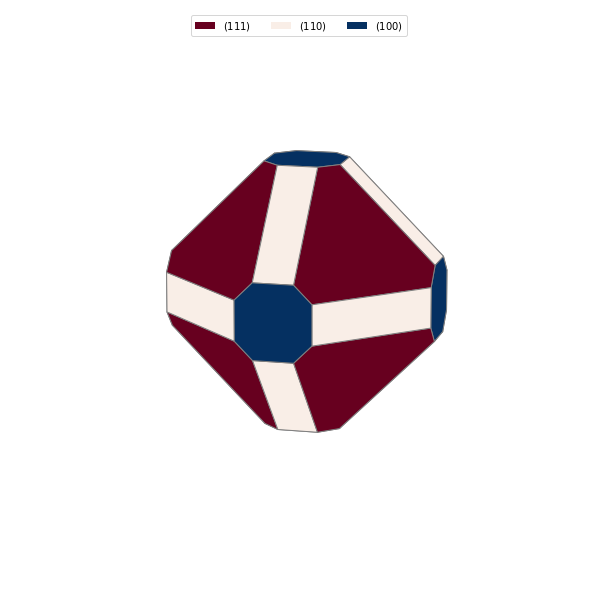

In [6]:
#Declare the lattic paramter
lattice = Lattice.cubic(5.411)
ceo = Structure(lattice,["Ce", "O"],
               [[0,0,0], [0.25,0.25,0.25]])
surface_energies_ceo = {(1,1,1): np.amin(Surface_111_1), (1,1,0): np.amin(Surface_110_1), (1,0,0): np.amin(Surface_100_1)}

miller_list = surface_energies_ceo.keys()
e_surf_list = surface_energies_ceo.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(ceo.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print("shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2" %(wulffshape.shape_factor, 
                                       wulffshape.anisotropy,
                                       wulffshape.weighted_surface_energy))


# If we want to see what our Wulff shape looks like
wulffshape.show(color_set="RdBu", direction=(1.00, 0.25, 0.25))